In [57]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
# načtení logů ze souboru
file_path = 'access.log'

with open(file_path, 'r') as file:
    logs = file.readlines()

#Výpis dat
for line in logs:
 print(line.strip())

98.76.54.32 - - [26/Jun/2023:08:24:29] "GET /https://www.twitter.com HTTP/1.1" 200 - "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
123.45.67.89 - - [26/Jun/2023:08:24:29] "GET /https://www.facebook.com HTTP/1.1" 200 - "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
104.236.218.124 - - [26/Jun/2023:08:24:29] "GET /https://www.netflix.com HTTP/1.1" 200 - "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
72.21.215.90 - - [26/Jun/2023:08:24:29] "GET /https://www.linkedin.com HTTP/1.1" 200 - "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
54.32.10.98 - - [26/Jun/2023:08:24:29] "GET /https://www.google.com HTTP/1.1" 200 - "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.1

In [59]:
# Získání seznamu IP adres a URL adres stránek z webových logů
ip_addresses = [log.split()[0] for log in logs]
urls = [log.split()[5] for log in logs]

In [60]:
# Výpočet počtu výskytů jednotlivých stránek
popularity_counter = Counter(urls)

In [61]:
# vytvoření kontingenční tabulky
df = pd.DataFrame({'URL adresa': urls, 'IP adresa': ip_addresses})

# počet přístupů na jednotlivé stránky z různých IP adres
contingency_table = pd.crosstab(df['URL adresa'], df['IP adresa']) #dva sloupce 

# výpis kontingenční tabulky
print("Kontingenční tabulka:")
print(contingency_table)

Kontingenční tabulka:
IP adresa                   104.236.218.124  12.34.56.78  123.45.67.89  \
URL adresa                                                               
/https://www.amazon.com                   1            0             0   
/https://www.facebook.com                 1            1             2   
/https://www.github.com                   1            1             1   
/https://www.google.com                   3            3             1   
/https://www.instagram.com                2            0             2   
/https://www.linkedin.com                 0            0             0   
/https://www.netflix.com                  1            0             0   
/https://www.twitter.com                  0            3             2   
/https://www.wikipedia.org                0            0             0   
/https://www.youtube.com                  3            1             0   

IP adresa                   172.217.20.142  185.199.111.153  203.0.113.42  \
URL adresa  

In [62]:
# Výpis nejnavštěvovanějších stránek
most_visited = popularity_counter.most_common(5)
most_visited_urls, most_visited_counts = zip(*most_visited) #zip = iterátor - *most_visited - rozbaleni jednotlivych url
print("Nejnavštěvovanější stránky:")
for (urls), count in most_visited:
    print(f"{urls}: {count} přístupů")

Nejnavštěvovanější stránky:
/https://www.twitter.com: 16 přístupů
/https://www.google.com: 15 přístupů
/https://www.instagram.com: 14 přístupů
/https://www.github.com: 10 přístupů
/https://www.facebook.com: 9 přístupů


In [63]:
# Výpis méně populárních stránek
less_visited = popularity_counter.most_common()[:-4:-1] #vybíra se od posledního prvku do šestého od konce (-1 zanmená opačné pořadí)
less_visited_urls, less_visited_counts = zip(*less_visited) #zip = iterátor - *less_visited - rozbaleni jednotlivych url
print("Méně populární stránky:")
for (urls), count in less_visited:
    print(f"{urls}: {count} přístupů")

Méně populární stránky:
/https://www.wikipedia.org: 5 přístupů
/https://www.linkedin.com: 6 přístupů
/https://www.netflix.com: 7 přístupů


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

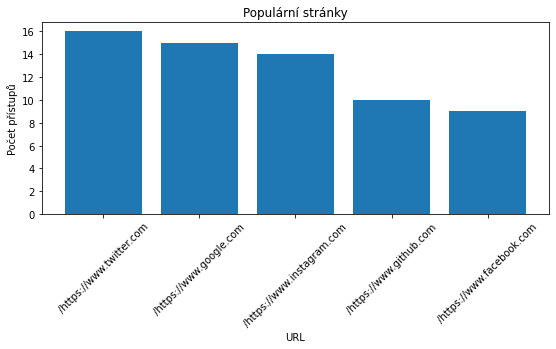

In [64]:
plt.figure(figsize=(20, 12))

# Nejnavštěvovanější stránky
plt.subplot(3, 2, 2)          #mřížka s 3 řádky a 2 sloupci subgrafů a vybraný je subgraf s indexem 2
plt.bar(most_visited_urls, most_visited_counts) # osa X a Y 
plt.title('Populární stránky')
plt.xlabel('URL')
plt.ylabel('Počet přístupů')
plt.xticks(rotation=45)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

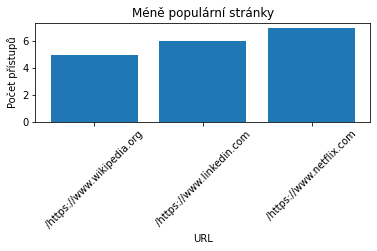

In [65]:
# Méně navštěvované stránky
plt.subplot(2, 1, 2)
plt.bar(less_visited_urls, less_visited_counts)
plt.title('Méně populární stránky')
plt.xlabel('URL')
plt.ylabel('Počet přístupů')
plt.xticks(rotation=45)